# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

fatal: destination path 'machine_learning_1' already exists and is not an empty directory.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

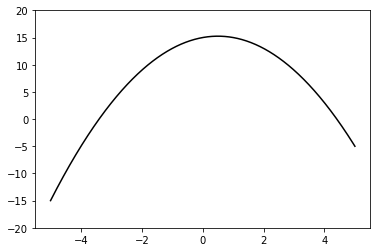

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

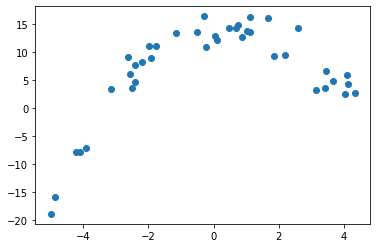

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(200,include_bias=False)
    X=poly.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [8]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [10]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [11]:
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression(normalize=True)
model_no_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

Training error (rmse): 0.002008391656258021
Testing error (rmse): 155674921.74797517


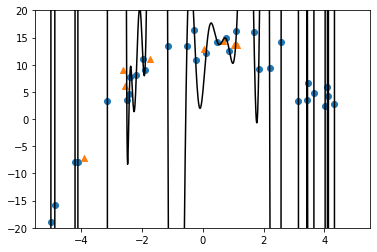

Polynomial coefficients
[4.767627178161022, 56.369443830735484, 197.70202772113154, -1006.1495294020648, -414.49967062647875, 4513.331864440453, -1553.5686838908637, -7091.121738309521, 3901.9818368042497, 5496.172574080318, -3439.157503461793, -2443.6979053894406, 1597.3405372154073, 663.3191932071192, -438.28439368633104, -110.81218624897313, 73.01226119266593, 10.86625227217845, -7.080157403408581, -0.5335529769240273, 0.3291792938989702, 0.006050351403584694, -0.00015574808217535117, 0.00018733693085228685, -0.0004154340528809818, 6.185352383832684e-06, -4.817981312572e-06, 4.6719434116381814e-07, 3.8779743885854237e-07, 1.3425313263408105e-09, 1.8362487567765217e-08, -1.3597976637391849e-09, 2.7463340638798103e-10, -8.555849378753113e-11, -7.918248382302339e-12, -2.573246306427078e-12, -6.323641585952834e-13, -8.43840682615644e-15, -2.159674224498243e-14, 3.743837299696633e-15, -4.483383952150568e-16, 2.563477700529095e-16, -4.1657028508511535e-18, 1.1185513895879732e-17, 3.897246

In [12]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [13]:
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.1,normalize=True)
model_L1_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.1, normalize=True)

Training error (rmse): 2.156840657812528
Testing error (rmse): 1.8233110897036684


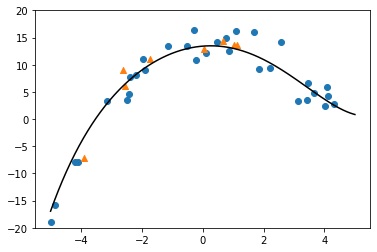

Polynomial coefficients
[13.419306822086458, 0.449528117465222, -0.8588656161161942, 0.0, -0.0, 0.002126847109079647, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0

In [14]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [15]:
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.1,normalize=True)
model_L2_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.1, normalize=True)

Training error (rmse): 2.196011231951924
Testing error (rmse): 1.710277451764147


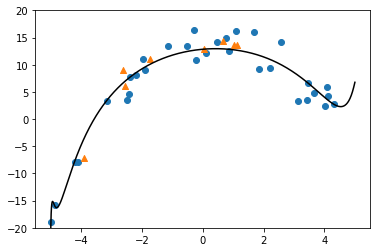

Polynomial coefficients
[12.846792197483165, 0.486810978115904, -0.5762938227890132, 0.013014439960574579, -0.012021728534538218, 0.0006129875648900849, -0.00021592466075347406, 2.8541475878908392e-05, -2.918628283314275e-06, 1.1009640406560661e-06, -3.5759877624714892e-09, 3.6426261539560734e-08, 1.921331029104133e-09, 1.07098891653983e-09, 1.1068273465180779e-10, 2.8190338611234253e-11, 4.862740239163002e-12, 6.400954903264801e-13, 1.9541309440537553e-13, 1.0515850856251435e-14, 7.573836300860715e-15, -2.496266402323893e-17, 2.8910279909398974e-16, -1.3691355893896189e-17, 1.0968249836086777e-17, -8.968701771089073e-19, 4.1526492682262633e-19, -4.508981358490433e-20, 1.5715617160317484e-20, -2.0322945280411467e-21, 5.948081017738038e-22, -8.63775961602293e-23, 2.2514076566304235e-23, -3.541850570532831e-24, 8.5203949078037e-25, -1.4182617820664515e-25, 3.2229887525369844e-26, -5.585855276207316e-27, 1.2181901791434096e-27, -2.1736084600162985e-28, 4.59941948946203e-29, -8.38122162345

In [16]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [17]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,1.127732,13.596585,1.838494e+01,12.837846,12.662823
1,-3.909422,-7.163796,-4.403152e+08,-3.406848,-3.694471
2,0.675107,14.272553,1.463644e+01,13.331640,12.914359
3,-1.747956,11.091072,9.498913e+01,9.974710,10.035334
4,0.046869,12.858476,7.739279e+00,13.438489,12.868344
5,-2.560891,6.043190,3.026793e+02,6.401276,6.924215
6,-2.613841,9.085322,1.359764e+03,6.116905,6.661857
7,1.031856,13.676624,1.088640e+01,12.971185,12.736675


### Real Example (Predict fuel efficiency)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [20]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### normal linear regression

In [21]:
# normal linear regression
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]
X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

model_no_reg = LinearRegression(normalize=True)
model_no_reg.fit(X_train, y_train)
ytest_predict=model_no_reg.predict(X_test)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.5639128558497175


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


#### using 50th order

In [22]:
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)

##### no regularization

In [23]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression(normalize=True)
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

62673.21197656972


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


##### lasso regularization

In [24]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.01,normalize=True)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.020606257556758


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


##### ridge regularization

In [25]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.01,normalize=True)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3.7867550327271036


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
